In [1]:
#%matplotlib notebook
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

from datetime import datetime, timedelta
from importlib import reload

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import sys

In [ ]:
#projectpath=''

# read data

In [772]:
def res_df(panID,year):
    '''
    resampled dataframe
    '''
    df0=pd.read_pickle(projectpath+'df_L2data_'+str(panID)+'_'+str(year))
    #unify qflags
    df0['qflag_l2_NO2']=[divmod(v,10)[1] for v in df0['qflag_l2_NO2'].values]
    
    #filter qflags
    df=df0[df0['qflag_l2_NO2']<1].resample('30min').mean()
    df['dhour']=df.index.hour+df.index.minute/60.
    return df

In [773]:
df=res_df(110,2020)
df.tail()

,vc_NO2,amf_NO2,integration_time,uncert_NO2,wl_shift,rms,qflag_l2_NO2,wl_temp,dhour
2020-03-29 10:30:00,0.201200,1.389,4.5,0.004715,-0.005500,0.000389,0.0,21.98,10.5
2020-03-29 11:00:00,0.217818,1.379,4.2,0.002425,-0.004662,0.000276,0.0,21.98,11.0
2020-03-29 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.5
2020-03-29 12:00:00,0.163245,1.421,10.1,0.004295,-0.004455,0.000527,0.0,21.98,12.0
2020-03-29 12:30:00,0.188823,1.444,8.6,0.003191,-0.004640,0.000293,0.0,21.98,12.5


# plot

In [717]:
def plot_style():
        """
        define custom mpl plot style
        """
        acolor='.94' #axes color
        tcolor='.3' #axes color
        #bgcolor='.94' #background color
        bgcolor=(.97,.97, .96)
        gcolor='1' #grid color

        plt.rcParams['axes.facecolor'] = bgcolor
        plt.rcParams['axes.linewidth'] = .5
        plt.rcParams['axes.edgecolor'] = acolor
        plt.rcParams['axes.axisbelow'] = True
        plt.rcParams['axes.labelcolor'] = acolor


        plt.rcParams['xtick.direction']='out'
        plt.rcParams['ytick.direction']='out'

        plt.rcParams['xtick.major.size']=0
        plt.rcParams['ytick.major.size']=0
        
        plt.rcParams['xtick.minor.size']=0
        plt.rcParams['ytick.minor.size']=0

        plt.rcParams['xtick.color']=tcolor
        plt.rcParams['ytick.color']=tcolor

        plt.rcParams['grid.color'] =gcolor
        plt.rcParams['grid.linewidth'] = .9
        plt.rcParams['grid.linestyle'] = '-'
        
        #plt.rcParams['xtick.minor.visible']= False

def format_xaxis_time(ax,t_start,t_end):
    """
    format the time xaxis
    """
    ax.set_xticks(pd.date_range(t_start.replace(hour=1), t_end.replace(hour=1),freq='MS'),minor=True)
    #ax.set_xticks(pd.date_range(t_start-timedelta(days=.5), t_end+timedelta(days=.5),freq='2D'),minor=False)
    ax.set_xticks(pd.date_range(t_start, t_end,freq='2D'),minor=False)

    #ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
    
    #ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%b %Y'))
    
    #ax.set_xticklabels('')
    ax.set_xlim(t_start - timedelta(days=0), t_end + timedelta(days=1))
    
    for tl in ax.xaxis.get_majorticklabels():
        tl.set_horizontalalignment("left")
    for tl in ax.xaxis.get_minorticklabels():
        tl.set_horizontalalignment("left")
            
    ax.tick_params(labelsize=9, length=0)
    ax.grid(True)  #,which='x')
    
plot_style()

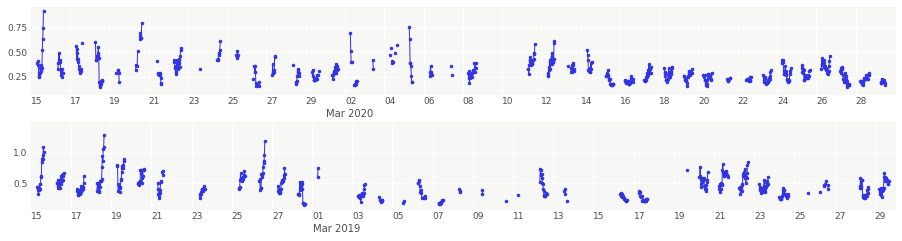

In [819]:
year=2020
df=res_df(110,year)

ax=plt.axes([0,.4,2,.3])
ax.plot(df['vc_NO2'],'.-',c=(.2,.2,.9),ms=5,lw=1)

t_start,t_end=df.index[0], df.index[-1]
t_start,t_end=datetime(year,2,15),datetime(year,3,29)
format_xaxis_time(ax,t_start,t_end)

year=2019
df=res_df(110,year)

ax=plt.axes([0,0,2,.3])
ax.plot(df['vc_NO2'],'.-',c=(.2,.2,.9),ms=5,lw=1)

t_start,t_end=df.index[0], df.index[-1]
t_start,t_end=datetime(year,2,15),datetime(year,3,29)
format_xaxis_time(ax,t_start,t_end)

In [742]:
def plot_WE_bg(ax,t_start,t_end):
    '''
    background for weekends
    '''
    bg_color=(.934,.934,.912)
    for d in pd.date_range(t_start,t_end):
        if (d.dayofweek==5) or (d.dayofweek==6):
            ax.fill_between(x=[d.replace(hour=2),d.replace(hour=22)],y1=[1,1],color=bg_color,zorder=0)
            
def plot_means(ax,panID,year):
    
    df=res_df(panID,year)
    
    df_g=df.groupby(df.index.date)
    dmin=df_g.min()['vc_NO2']
    dmax=df_g.max()['vc_NO2']
    dmean=df_g.mean()['vc_NO2']

    days=np.unique(df.index.date)
    
    days_dt=[datetime.combine(d,datetime.min.time())+timedelta(days=.5) for d in days]
    
    ax.vlines(days_dt,dmin,dmax,lw=4,color=(.7,.7,.8))
    ax.plot(days_dt,dmean,'.',c=(.2,.2,.8),ms=10)
    
    t_start,t_end=datetime(year,2,28),datetime(year,3,30)
    
    format_xaxis_time(ax,t_start,t_end)
    plot_WE_bg(ax,t_start,t_end)
    
    ax.set_ylim(0,1)
    ax.grid(True)
    
def plot_maxs(ax,panID,year):
    
    df=res_df(panID,year)
    
    df_g=df.groupby(df.index.date)
    dmin=df_g.min()['vc_NO2']
    dmax=df_g.max()['vc_NO2']
    dmean=df_g.mean()['vc_NO2']

    days=np.unique(df.index.date)
    
    #ax.vlines(days,dmin,dmax,lw=4,color=(.7,.7,.8))
    #ax.plot(days,dmax,'.',c=(.2,.2,.8),ms=10)
    ax.bar(days,dmax,color=(.2,.2,.8),align='edge',width=.92)
    
    t_start,t_end=datetime(year,2,28),datetime(year,3,30)
    
    format_xaxis_time(ax,t_start,t_end)
    plot_WE_bg(ax,t_start,t_end)
    
    ax.set_ylim(0,1)
    ax.grid(True)

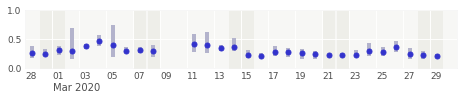

In [837]:
ax=plt.axes([0,.66,1,.2])
plot_means(ax,110,2020)

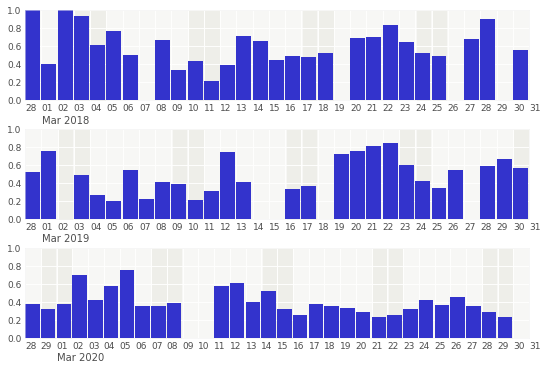

In [743]:
plt.figure(figsize=(7,5))
h=.25
w=1
ax=plt.axes([0,.66,w,h])
plot_maxs(ax,106,2018)

ax=plt.axes([0,.33,w,h])
plot_maxs(ax,110,2019)

ax=plt.axes([0,0,w,h])
plot_maxs(ax,110,2020)

In [798]:
from matplotlib.colors import ListedColormap
import seaborn as sns

In [803]:
def bar_steps(ax,x,y):
    steps=np.arange(.8,0,-.05)
    cmap_bars=plt.get_cmap('Reds_r',len(steps)+1)
    cmap_l1=sns.cubehelix_palette(len(steps)+1, start=1.8, rot=1.5,light=0.8,dark=0.23)[::-1]
    cmap_bars=ListedColormap(cmap_l1)

    
    k=0
    for step in steps:
        bar_hs=[min(r,step) for r in y]
        #print(bar_hs)
        ax.bar(x,bar_hs,color=cmap_bars(k),align='edge',width=.92)
        k+=1
    
def plot_maxs_steps(ax,panID,year):
    
    df=res_df(panID,year)
    
    df_g=df.groupby(df.index.date)
    dmin=df_g.min()['vc_NO2']
    dmax=df_g.max()['vc_NO2']
    dmean=df_g.mean()['vc_NO2']

    days=np.unique(df.index.date)
    
    #ax.bar(days,dmax,color=(.2,.2,.8),align='edge',width=.92)
    bar_steps(ax,days,dmax.values)
    
    t_start,t_end=datetime(year,3,1),datetime(year,3,29)
    
    format_xaxis_time(ax,t_start,t_end)
    plot_WE_bg(ax,t_start,t_end)
    
    ax.set_ylim(0,1)
    ax.grid(axis='x')


Text(2020-03-16 01:00:00, 0.8, 'start of lock down')

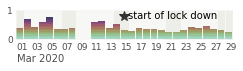

In [804]:
ax=plt.axes([0,0,w,h])
plot_maxs_steps(ax,110,2020)
ax.plot(datetime(2020,3,15,12),.8,marker='*',ms=10,c='.2')
ax.annotate('start of lock down',xy=(datetime(2020,3,16,1),.8),xycoords='data',fontsize=10,
           va='center')

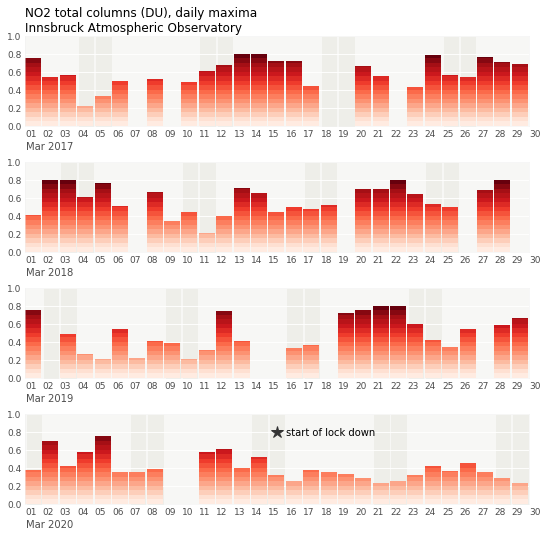

In [754]:
plt.figure(figsize=(7,5))
h=.25
dh=.1
w=1

ax=plt.axes([0,3*(h+dh),w,h])
plot_maxs_steps(ax,110,2017)
ax.annotate('NO2 total columns (DU), daily maxima \nInnsbruck Atmospheric Observatory',
            xy=(0,1.05),xycoords='axes fraction',fontsize=12)

ax=plt.axes([0,2*(h+dh),w,h])
plot_maxs_steps(ax,106,2018)

ax=plt.axes([0,1*(h+dh),w,h])
plot_maxs_steps(ax,110,2019)

ax=plt.axes([0,0,w,h])
plot_maxs_steps(ax,110,2020)
ax.plot(datetime(2020,3,15,12),.8,marker='*',ms=12,c='.2')
ax.annotate('start of lock down',xy=(datetime(2020,3,16,1),.8),xycoords='data',fontsize=10,
           va='center')

plt.savefig(projectpath+'NO2_tc_IAO_march_va.png',bbox_inches='tight',dpi=600)

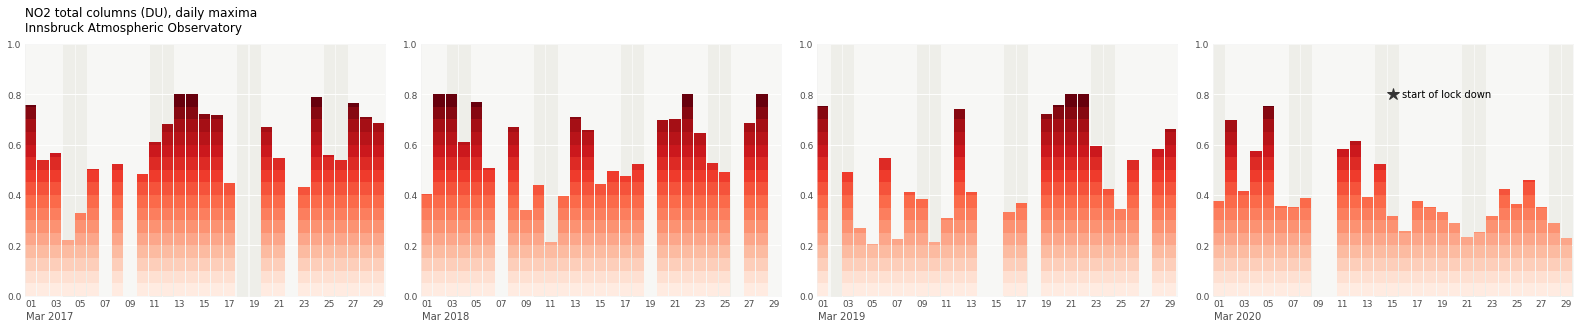

In [771]:
plt.figure(figsize=(10,7))
h=.5
w=.5
dw=.05

ax=plt.axes([0,0,w,h])
plot_maxs_steps(ax,110,2017)
ax.annotate('NO2 total columns (DU), daily maxima \nInnsbruck Atmospheric Observatory',
            xy=(0,1.05),xycoords='axes fraction',fontsize=12)

ax=plt.axes([1*(w+dw),0,w,h])
plot_maxs_steps(ax,106,2018)

ax=plt.axes([2*(w+dw),0,w,h])
plot_maxs_steps(ax,110,2019)

ax=plt.axes([3*(w+dw),0,w,h])
plot_maxs_steps(ax,110,2020)
ax.plot(datetime(2020,3,15,12),.8,marker='*',ms=12,c='.2')
ax.annotate('start of lock down',xy=(datetime(2020,3,16,6),.8),xycoords='data',fontsize=10,
           va='center')

plt.savefig(projectpath+'NO2_tc_IAO_march_ha.png',bbox_inches='tight',dpi=600)

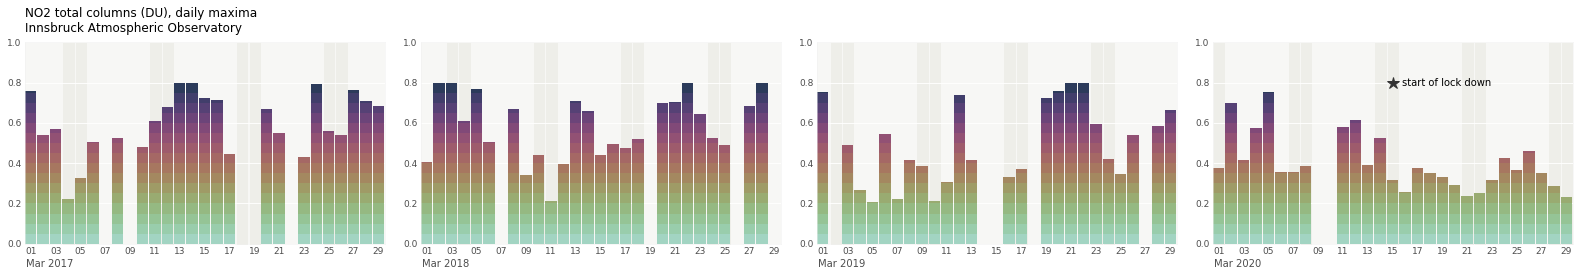

In [815]:
plt.figure(figsize=(10,7))
h=.4
w=.5
dw=.05

ax=plt.axes([0,0,w,h])
plot_maxs_steps(ax,110,2017)
ax.annotate('NO2 total columns (DU), daily maxima \nInnsbruck Atmospheric Observatory',
            xy=(0,1.05),xycoords='axes fraction',fontsize=12)

ax=plt.axes([1*(w+dw),0,w,h])
plot_maxs_steps(ax,106,2018)

ax=plt.axes([2*(w+dw),0,w,h])
plot_maxs_steps(ax,110,2019)

ax=plt.axes([3*(w+dw),0,w,h])
plot_maxs_steps(ax,110,2020)
ax.plot(datetime(2020,3,15,12),.8,marker='*',ms=12,c='.2')
ax.annotate('start of lock down',xy=(datetime(2020,3,16,6),.8),xycoords='data',fontsize=10,
           va='center')

plt.savefig(projectpath+'NO2_tc_IAO_march_ha_cmap2.png',bbox_inches='tight',dpi=600)
plt.savefig(projectpath+'NO2_tc_IAO_march_ha_cmap2.eps',bbox_inches='tight')
plt.savefig(projectpath+'NO2_tc_IAO_march_ha_cmap2.pdf',bbox_inches='tight')

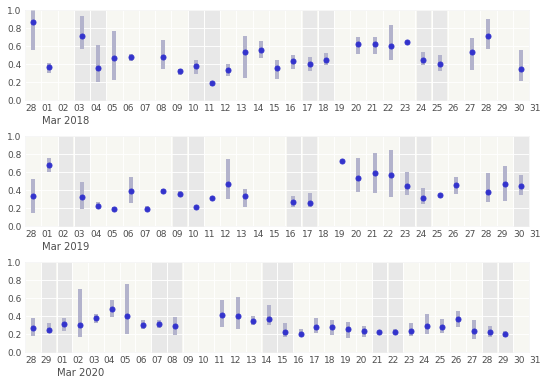

In [671]:
plt.figure(figsize=(7,5))
h=.25
dh=.1
w=1
ax=plt.axes([0,2*(h+dh),w,h])
plot_means(ax,106,2018)

ax=plt.axes([0,h+dh,w,h])
plot_means(ax,110,2019)

ax=plt.axes([0,0,w,h])
plot_means(ax,110,2020)

In [781]:
df_2020=res_df(110,2020)

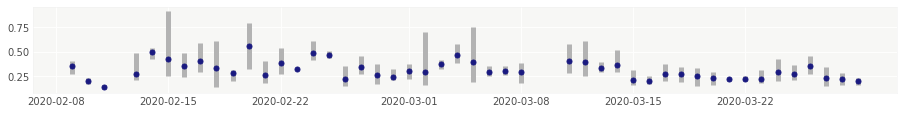

In [782]:
df_g=df_2020.groupby(df_2020.index.date)
dmin=df_g.min()['vc_NO2']
dmax=df_g.max()['vc_NO2']
dmean=df_g.mean()['vc_NO2']

days=np.unique(df_2020.index.date)
ax=plt.axes([0,0,2,.3])
ax.vlines(days,dmin,dmax,lw=5,color='.7')
ax.plot(days,dmean,'.',c=(.1,.1,.5),ms=10)

ax.grid(True)

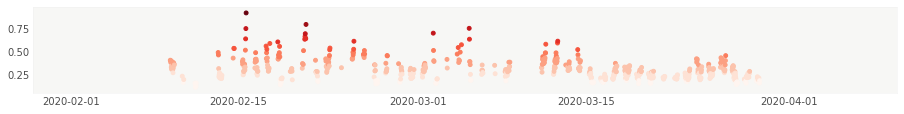

In [787]:
ax=plt.axes([0,0,2,.3])
#ax.plot(df_2020['vc_NO2'],'.',c=(.2,.2,.9),ms=5)
ax.scatter(df_2020.index,df_2020['vc_NO2'],marker='o',s=15,c=df_2020['vc_NO2'],cmap=plt.get_cmap('Reds',10))

In [206]:
df_2020.index[0],df_2020.index[-1]

(Timestamp('2020-02-16 09:00:00', freq='10T'),
 Timestamp('2020-03-26 16:40:00', freq='10T'))

(0, 2.2)

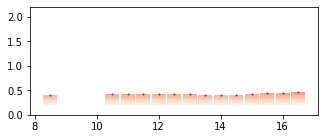

In [374]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0,0,.5,.3])

day='2020-3-22'
yoffs=.2
steps=np.arange(.8,0,-.05)
cmap_bars=plt.get_cmap('Reds_r',len(steps)+1)
#steps=np.arange(0,1,.2)
ax.plot(df_2020[day]['dhour'],df_2020[day]['vc_NO2']+yoffs,'.',c=(.2,.2,.9),ms=2)
k=0
for step in steps:
    bar_hs=[min(r,step) for r in df_2020[day]['vc_NO2'].values]
    #print(bar_hs)
    ax.bar(df_2020[day]['dhour'],np.array(bar_hs),
           bottom=yoffs,color=cmap_bars(k),align='center',width=.45)#,zorder=k)
    
    k+=1
    
ax.set_ylim(0,2.2)

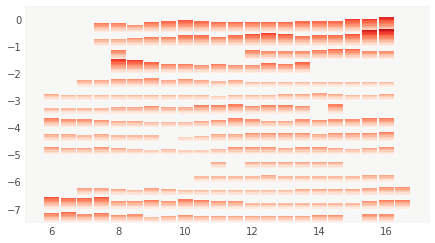

In [788]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0,0,.7,.6])

steps=np.arange(.8,0,-.05)
cmap_bars=plt.get_cmap('Reds_r',len(steps)+1)
#steps=np.arange(0,1,.2)
yoffs=0
for dt in pd.date_range(datetime(2020,3,10),datetime(2020,3,25),freq='1d'):
    day=dt.strftime('%Y-%m-%d')
    #ax.plot(df_2020[day]['dhour'],df_2020[day]['vc_NO2']+yoffs,'.-',c=(.2,.2,.9),ms=2)
    k=0
    for step in steps:
        bar_hs=[min(r,step) for r in df_2020[day]['vc_NO2'].values]
        #print(bar_hs)
        ax.bar(df_2020[day]['dhour'].values,np.array(bar_hs),
               bottom=yoffs*np.ones(len(df_2020[day])),color=cmap_bars(k),align='center',width=.45)#,zorder=k)

        k+=1
    
    yoffs+=-.5
    
#ax.set_ylim(0,1)